# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Лабораторная работа №1. Supervised learning <center>

## Table of contents  
  
* [Часть 1. Работа с данными](#part1)
* [Часть 2. Методы машинного обучения](#part2)
* [Часть 3. Соревнование по машинному обучению](#part3)

## Часть 1. Работа с данными <a id="part1"></a>

В данной части лабораторной вам предстоит работать с данными по оттоку клиентов одной телекомуникационной компании. Оригинал данных доступен [здесь](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383). Для лабораторной работы данные были модифицированы.

Данные находятся в файле `telecom_churn_mod.csv`

**Описание данных:**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', -1)

### Задание 1  
  
Считайте данные из файла. Оцените размерность данных, есть ли в данных пропущенные значения. Посмотрите на автоматически определенные типы признаков.

In [32]:
data = pd.read_csv('telecom_churn_mod.csv', delimiter=';')
data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,40075,Female,37.0,KS,128,415 424 17 55,Voice mail,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,75.56,1,False
1,17475,Female,NaN,OH,107,415 759 41 43,Voice mail,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,59.24,1,False
2,62242,Female,19.0,NJ,137,415 213 11 40,None,0,243.4,114.0,41.38,121.2,110.0,10.30,l62.6,104.0,7.32,12.2,5.0,3.29,62.29,0,False
3,81231,Female,31.0,OH,84,408 487 53 35,International,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,66.8,2,False
4,78542,Female,30.0,OK,75,415 509 25 27,International,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,52.09,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null object
Total day calls           3333 non-null object
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null object
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null object
Total intl calls          3333 non-null flo

### Задание 2  
  
Приведите числовые признаки, которые были распознаны некорректно, к числовому типу данных.  
Найдите и опишите ошибки в данных, которые мешают приведению типов. Сколько признаков содержат ошибки, сколько наблюдений по каждому такому признаку? Исправьте эти ошибки и снова выполните приведение типов.  
**NB:** Исправлять ошибки необходимо программно (используя python), изменять исходный файл "руками" не разрешается. 

In [33]:
replace = [',', 'o', 'l']
insert = ['.', '0', '1']

mistake_NightMinutes = 0
mistake_DayMinutes = 0
mistake_DayCalls = 0
mistake_IntlMinutes = 0
mistake_Charge = 0
mistake_ServiceCalls = 0

for i in range(1, data['Total day minutes'].shape[0]):
    for k in range(0,3):
        if replace[k] in data['Total night minutes'][i]:
            data['Total night minutes'][i]=data['Total night minutes'][i].replace(replace[k], insert[k])
            mistake_NightMinutes += 1
        if replace[k] in data['Total day minutes'][i]:
            data['Total day minutes'][i]=data['Total day minutes'][i].replace(replace[k], insert[k])
            mistake_DayMinutes += 1
        if replace[k] in data['Total day calls'][i]:
            data['Total day calls'][i]=data['Total day calls'][i].replace(replace[k], insert[k])
            mistake_DayCalls += 1
        if replace[k] in data['Total intl minutes'][i]:
            data['Total intl minutes'][i]=data['Total intl minutes'][i].replace(replace[k], insert[k])
            mistake_IntlMinutes += 1
        if replace[k] in data['Total charge'][i]:
            data['Total charge'][i]=data['Total charge'][i].replace(replace[k], insert[k])
            mistake_Charge += 1
        if replace[k] in data['Customer service calls'][i]:
            data['Customer service calls'][i]=data['Customer service calls'][i].replace(replace[k], insert[k])
            mistake_ServiceCalls += 1
    if 'hundred' in data['Total charge'][i]:
        data['Total charge'][i]=data['Total charge'][i].replace('hundred', '')
        mistake_Charge += 1

data['Total day minutes'] = data['Total day minutes'].astype('float64')
data['Total day calls'] = data['Total day calls'].astype('float64')
data['Total night minutes'] = data['Total night minutes'].astype('float64')
data['Total intl minutes'] = data['Total intl minutes'].astype('float64')
data['Total charge'] = data['Total charge'].astype('float64')
data['Customer service calls'] = data['Customer service calls'].astype('int64')

print('mistake_DayMinutes ',mistake_DayMinutes,
    '\nmistake_NightMinutes ',mistake_NightMinutes,
    '\nmistake_DayCalls ',mistake_DayCalls,
    '\nmistake_IntlMinutes ',mistake_IntlMinutes,
    '\nmistake_Charge',mistake_Charge,
    '\nmistake_ServiceCalls',mistake_ServiceCalls)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

mistake_DayMinutes  50 
mistake_NightMinutes  10 
mistake_DayCalls  4 
mistake_IntlMinutes  32 
mistake_Charge 15 
mistake_ServiceCalls 6


Ошибки содержат 6 признаков:
'Total day minutes' - 50 наблюдений
'Total day calls' - 4 наблюдения 
'Total night minutes' - 10 наблюдений
'Total intl minutes' - 32 наблюдения
'Total charge' - 15 наблюдений
'Customer service calls' - 6 наблюдений

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null float64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null

### Задание 3  
  
Оцените набор данных на предмет пропущенных значений. Какие признаки содержат пропуски? Сколько наблюдений с пропусками по каждому такому признаку?  
По каждому признаку предложите и обоснуйте, что делать с пропущенными значениями. 

In [7]:
data.isnull().sum()

ID                        0   
Sex                       0   
Age                       1000
State                     0   
Account length            0   
Phone number              0   
Plans                     100 
Number vmail messages     0   
Total day minutes         0   
Total day calls           0   
Total day charge          0   
Total eve minutes         0   
Total eve calls           0   
Total eve charge          0   
Total night minutes       0   
Total night calls         0   
Total night charge        0   
Total intl minutes        0   
Total intl calls          0   
Total intl charge         0   
Total charge              0   
Customer service calls    0   
Churn                     0   
dtype: int64

In [34]:
data.Age = data.Age.fillna(data.Age.mean())
data.Age = data.Age.astype('int64')

In [35]:
data.Plans = data.Plans.fillna('None')

В Age - 1000 пропусков, в Plans - 100
Age разумно заполнить средними значениями по этому признаку, а в пропуски Plans можно поставить None

### Задание 4  
  
В признаке `Phone number` первые три цифры номера отвечают за код зоны покрытия сети.  
Создайте новый признак `Area code`, содержайщий код покрытия сети.  
Вычислите, сколько таких зон представлено в данных. Сколько наблюдений по каждой зоне?  
Вычислите, сколько штатов входит в каждую зону. Есть ли штаты, которые находятся сразу в нескольких зонах покрытия? Если есть, приведите примеры.

In [36]:
data['Area code'] = [x[0] for x in data['Phone number'].str.split()]

In [37]:
data['Area code'] = data['Area code'].astype('int64')

In [11]:
data['Area code'].unique()

array([415, 408, 510], dtype=int64)

In [12]:
data['Area code'].value_counts()

415    1655
510    840 
408    838 
Name: Area code, dtype: int64

в данных присутствует 3 зоны покрытия: 415 - 1655 наблюдений, 510 - 840 наблюдений, 408 - 838 наблюдений

In [13]:
pd.crosstab(data['State'], data['Area code'])
#sns.countplot(x='Area code', hue='State', data=data)
#plt.show()

Area code,408,415,510
State,,,
AK,14,24,14
AL,25,40,15
AR,13,27,15
AZ,15,36,13
CA,7,17,10
CO,25,29,12
CT,22,39,13
DC,14,27,13
DE,13,31,17


Из таблицы видно, что в каждую зону входит каждый штат, все штаты находятся сразу во всех зонах покрытия

### Задание 5  
  
Вычислите тарифные планы (стоимость минуты разговора): day, eve, night, intl.  
Проверьте, различаются ли они для различных зон покрытия сети. 

In [34]:
data['Total day charge'].mean()/data['Total day minutes'].mean()

0.17000296833948486

In [35]:
data['Total eve charge'].mean()/data['Total eve minutes'].mean()

0.08500103722220424

In [36]:
data['Total night charge'].mean()/data['Total night minutes'].mean()

0.04500039969594803

In [37]:
data['Total intl charge'].mean()/data['Total intl minutes'].mean()

0.27005020776129424

In [80]:
price = data.groupby(['Area code']).agg({'Total day minutes':'mean', 'Total day charge':'mean', 'Total eve minutes':'mean', 'Total eve charge':'mean',
                                        'Total night minutes':'mean', 'Total night charge':'mean', 'Total intl minutes':'mean', 'Total intl charge':'mean',})
price

,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge
Area code,,,,,,,,
408,177.367840,30.152983,201.406325,17.119678,199.325776,8.969785,10.131981,2.736253
415,182.498701,31.025366,201.298248,17.110495,202.614713,9.117764,10.371360,2.800792
510,179.778095,30.562798,201.878571,17.160083,200.920000,9.041393,10.169881,2.746262


In [98]:
print('Area 408-day cost: ',round(price['Total day charge']['408']/price['Total day minutes']['408'],3))
print('Area 415-day cost: ',round(price['Total day charge']['415']/price['Total day minutes']['415'],3))
print('Area 510-day cost: ',round(price['Total day charge']['510']/price['Total day minutes']['510'],3))

print('Area 408-eve cost: ',round(price['Total eve charge']['408']/price['Total eve minutes']['408'],3))
print('Area 415-eve cost: ',round(price['Total eve charge']['415']/price['Total eve minutes']['415'],3))
print('Area 510-eve cost: ',round(price['Total eve charge']['510']/price['Total eve minutes']['510'],3))

print('Area 408-night cost: ',round(price['Total night charge']['408']/price['Total night minutes']['408'],3))
print('Area 415-night cost: ',round(price['Total night charge']['415']/price['Total night minutes']['415'],3))
print('Area 510-night cost: ',round(price['Total night charge']['510']/price['Total night minutes']['510'],3))

Area 408-day cost:  0.17
Area 415-day cost:  0.17
Area 510-day cost:  0.17
Area 408-eve cost:  0.085
Area 415-eve cost:  0.085
Area 510-eve cost:  0.085
Area 408-night cost:  0.045
Area 415-night cost:  0.045
Area 510-night cost:  0.045


Тарифные планы для различных зон не различаются

### Задание 6  
  
По каждому штату и каждому плану в признаке `Plans` (International и Voice mail) вычислите количество клиентов, подключивших этот план и их долю внутри штата. Пример вывода:
  
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Plan</th>
      <th>Count</th>
      <th>Frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>state_1</td>
      <td>International</td>
      <td>40</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>state_1</td>
      <td>Voice mail</td>
      <td>30</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state_2</td>
      <td>International</td>
      <td>25</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>state_2</td>
      <td>Voice mail</td>
      <td>35</td>
      <td>0.7</td>
    </tr>
  </tbody>
</table>

In [13]:
#clients = data.groupby(['State','Plans']).agg({'Plans':'count'})
#clients

In [14]:
clients = pd.DataFrame(columns=['State', 'Plan', 'Count', 'Frac']) 

for i in data['State'].unique(): 
    buf = data.loc[data['State'] == i] 

    count = len(buf.loc[buf['Plans'] == 'International']) 
    frac = count / len(buf) 
    s = pd.Series([i, 'International', count, frac], index=['State', 'Plan', 'Count', 'Frac']) 
    clients = clients.append(s, ignore_index=True) 

    count = len(buf.loc[buf['Plans'] == 'Voice mail']) 
    frac = count / len(buf) 
    s = pd.Series([i, 'Voice mail', count, frac], index=['State', 'Plan', 'Count', 'Frac']) 
    clients = clients.append(s, ignore_index=True) 

clients.head(20)

,State,Plan,Count,Frac
0,KS,International,6,0.085714
1,KS,Voice mail,17,0.242857
2,OH,International,4,0.051282
3,OH,Voice mail,22,0.282051
4,NJ,International,2,0.029412
5,NJ,Voice mail,16,0.235294
6,OK,International,4,0.065574
7,OK,Voice mail,16,0.262295
8,AL,International,7,0.087500
9,AL,Voice mail,20,0.250000


### Задание 7  
  
Для нечисловых признаков выполните преобразование к числовому виду. Обоснуйте выбранное преобразование для каждого признака. 

In [38]:
data['International plan'] = data.Plans.map({'None' : 0, 'International' : 1, 'Voice mail' : 0, 'International, Voice mail':1})
data['Voice mail plan'] = data.Plans.map({'None' : 0, 'International' : 0, 'Voice mail' : 1, 'International, Voice mail':1})

data['Male'] = data['Sex'].map({'Female' : 0, 'Male' : 1})
data['Female'] = data['Sex'].map({'Male' : 0, 'Female' : 1})

data.Male = data.Male.astype('int64')
data.Female = data.Female.astype('int64')
data['International plan'] = data['International plan'].astype('int64')
data['Voice mail plan'] = data['Voice mail plan'].astype('int64')

Для эффективности решения нужно преобразовать признак Plans в два бинарных признака, то же самое - с признаком Sex 

### Задание 8  
  
Сколько линейно-зависимых признаков присуствует в данных?  
Определите и удалите признаки, которые линейно зависят от остальных.

In [39]:
data = data.drop(['ID', 'Sex', 'State', 'Phone number', 'Plans'], axis=1, inplace=False)

Признаки ID и Phone number являются уникальными - можно удалить 

In [40]:
data.head(5)

,Age,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,International plan,Voice mail plan,Male,Female
0,37,128,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,75.56,1,False,415,0,1,0,1
1,34,107,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,59.24,1,False,415,0,1,0,1
2,19,137,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,62.29,0,False,415,0,0,0,1
3,31,84,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,66.80,2,False,408,1,0,0,1
4,30,75,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,52.09,3,False,415,1,0,0,1


### Задание 9  
  
Проведите анализ зависимости признаков.  
Для числовых признаков вычислите корреляции друг с другом и с целевой переменной `Churn`. Постройте heatmap.  
Для категориальных признаков оцените их связь с целевой переменной, постройте графики.  
  
Сделайте выводы по результатм анализа. Можно ли избавиться от некоторых признаков? Если да, то от каких и почему?

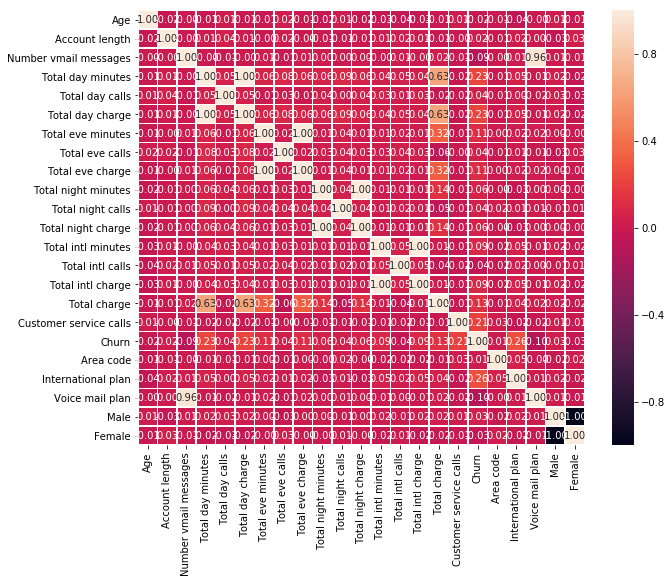

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()

Из таблицы видно, что признаки total day charge (night, eve, intl) зависят от
признака total day minutes (night, eve, intl), и вычисляются умножением total minutes на опред. коэф(стоимость тарифного плана), поэтомуих можно удалить.  
Total charge является суммой всех признаков charge,его можно удалить. 


In [42]:
data = data.drop(['Total charge', 'Total day charge', 'Total night charge', 
                  'Total intl charge', 'Total eve charge'], axis=1, inplace=False)

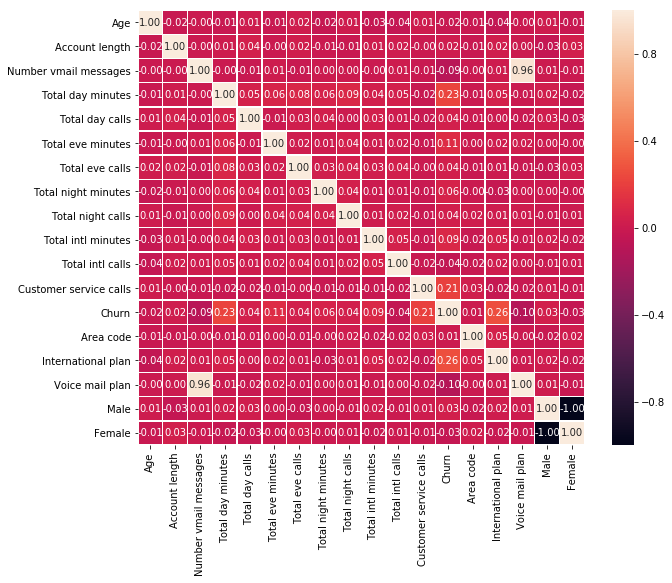

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()

### Задание 10  
  
Рассмотрим основанную на правилах модель для предсказания оттока клиентов: 
* Если у пользователя подключен роуминг (International plan) & клиент звонил в тех. поддержку более 3-х раз => клиент уйдет (Churn = True)
* Иначе => клиент останется (Churn = False)  
  
  
Оцените качество данной модели на 5-fold валидации из 5 повторений. Для оценки качества рассмотрите различные метрики: F1-score, precision, recall, accuracy, balanced accuracy. Дайте комментарий к оценке.

In [19]:
Data = data.drop(['Churn'], axis=1)
label = data['Churn']

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [26]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
f1 = []
precision = []
recall = []
accuracy = []

for train_index, test_index in rskf.split(Data, label):
    model = (Data.loc[test_index]['International plan']==1) & (Data.loc[test_index]['Customer service calls']>3)
    
    f1.append(metrics.f1_score(y_true=label[test_index], y_pred=model))
    precision.append(metrics.precision_score(y_true=label[test_index], y_pred=model))
    recall.append(metrics.recall_score(y_true=label[test_index], y_pred=model))
    accuracy.append(metrics.accuracy_score(y_true=label[test_index], y_pred=model))
    
print('f1_score ', pd.Series(f1).mean())
print('percision ', pd.Series(precision).mean())
print('recall ', pd.Series(recall).mean())
print('accuracy ', pd.Series(accuracy).mean())

f1_score  0.07399237865805555
percision  0.6878095238095239
recall  0.039342783505154647
accuracy  0.8580866323594961


## Часть 2. Методы машинного обучения <a id="part2"></a>

Продолжаем работать с данными по оттоку клиентов.  
Сформулируем задачу машинного обучения: необходимо построить модель, определяющую, останется клиент или уйдет. 
  
Для решения заданий, представленных ниже, необходимо использовать данные, полученные после выполнения всех преобразований в первой части. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from plot_cm import plot_confusion_matrix
from sklearn.model_selection import KFold

In [44]:
Data = data.drop(['Churn'], axis=1)
label = data['Churn']

In [28]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [29]:
dtree_model = DecisionTreeClassifier(max_depth=5)

kf = KFold(n_splits=5)
kf_scores = cross_val_score(dtree_model, Data, label, cv=kf, scoring='f1_micro')
kf_scores.mean()

0.93549576563069825

In [30]:
pd.Series(kf_scores).describe()


count    5.000000
mean     0.935796
std      0.006105
min      0.928036
25%      0.933934
50%      0.934033
75%      0.938531
max      0.944444
dtype: float64

### Задание 2  
  
На кросс-валидации (5-fold из 5 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [31]:
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: []}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

for x in scores:
    if x == 1:
        bootstrap = False
    else:
        bootstrap = True
            
    rf_model = RandomForestClassifier(n_estimators=x, bootstrap=bootstrap)
    scores[x] = cross_val_score(rf_model, Data, label, cv=rskf, scoring='f1_micro')
    
scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' estimators' for x in scores.columns]

In [32]:
scores.describe()

,1 estimators,2 estimators,5 estimators,10 estimators,50 estimators,100 estimators
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.884608,0.902251,0.928472,0.936695,0.945515,0.946656
std,0.014624,0.014681,0.008028,0.008138,0.005488,0.007365
min,0.847076,0.878378,0.909910,0.919040,0.934033,0.932534
25%,0.877061,0.892054,0.924925,0.929429,0.944444,0.941529
50%,0.886057,0.902402,0.928036,0.938438,0.946027,0.946027
75%,0.892054,0.915916,0.935435,0.944444,0.949025,0.953453
max,0.917417,0.926537,0.940030,0.949025,0.955022,0.959520


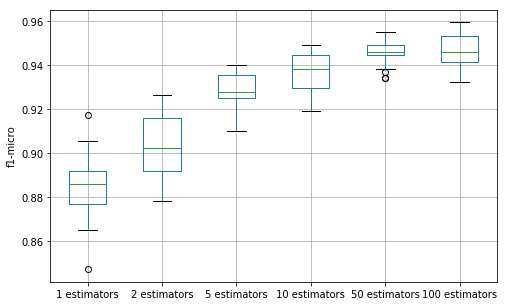

In [33]:
scores.boxplot(figsize=(8,5))
plt.ylabel('f1-micro')
plt.show()

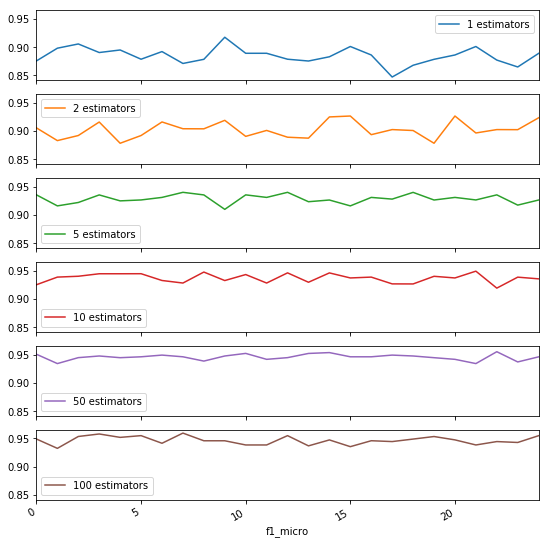

In [34]:
scores.plot(subplots=True, sharey=True, figsize=(9, 10))
plt.xlabel('iteration')
plt.xlabel('f1_micro')
plt.show()

В данном случае достаточно 50 деревьев, посколько при увеличении кол-ва деревьев улучшение качества будет незначительным

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. Обучите Random Forest  с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [35]:
from sklearn.model_selection import GridSearchCV

In [81]:
Data = data.drop(['Churn'], axis=1)

In [51]:
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': range(5,7),
    'min_samples_split': range(2, 9, 3),
    'min_samples_leaf': range(1, 9, 3),
    'max_features': [None, 3, 5]
}

In [52]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
rf_model = RandomForestClassifier()
grid = GridSearchCV(rf_model, params, cv=rskf, scoring='f1_micro', n_jobs=1)

In [53]:
%%time
grid.fit(Data, label)

Wall time: 1h 3min 4s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x00000294C9D9C3C8>,
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': range(5, 7), 'min_samples_split': range(2, 9, 3), 'min_samples_leaf': range(1, 9, 3), 'max_features': [None, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [54]:
grid.best_score_

0.94815481548154812

In [55]:
grid.best_params_

{'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [83]:
from sklearn.metrics import f1_score

In [84]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2)
rf_model.fit(trainData, train_label)
preds = rf_model.predict(testData)

forest_score = f1_score(test_label, preds)

In [85]:
forest_score

0.68595041322314054

In [88]:
scores = pd.Series(
    [
        metrics.f1_score(test_label, 
                         x.predict(testData)) for x in rf_model.estimators_
    ]
)
scores.describe()

count    100.000000
mean     0.506298  
std      0.105595  
min      0.263158  
25%      0.442700  
50%      0.527001  
75%      0.577968  
max      0.742647  
dtype: float64

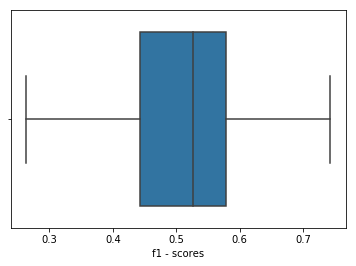

In [89]:
sns.boxplot(scores)
plt.xlabel('f1 - scores')
plt.show()

In [197]:
rf_model.feature_importances_

array([ 0.00986805,  0.01185428,  0.03823558,  0.22124733,  0.01489921,
        0.15991623,  0.05435236,  0.01238978,  0.05663999,  0.02170107,
        0.01082031,  0.02086057,  0.03805561,  0.03359799,  0.02345202,
        0.1261671 ,  0.00260773,  0.11050879,  0.03102812,  0.00099991,
        0.00079796])

In [90]:
pd.Series(rf_model.feature_importances_, 
          index=Data.columns).sort_values(ascending=False)

Total day minutes         0.247382
Customer service calls    0.183141
International plan        0.143309
Total eve minutes         0.094123
Total intl minutes        0.072054
Total intl calls          0.053934
Total night minutes       0.038209
Number vmail messages     0.033354
Total eve calls           0.024258
Total night calls         0.023752
Total day calls           0.023477
Voice mail plan           0.019653
Account length            0.018234
Age                       0.015925
Area code                 0.005543
Female                    0.001893
Male                      0.001758
dtype: float64

Total day minutes ожидаемо оказывает наибольшее влияние на целевую переменную, а признаки Sex, Area code, Age почти никак не влияют, их можно было удалить. 

### Задание 4  
  
* Используйте логистическую регрессию для решения задачи, оцените качество (roc auc) на 5-fold валидации из 5 повторений. 
* Аналогично (на такой же валидации с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. На обучающей выборке обучите логистическую регрессию и Random Forest  с настроенными параметрами. Для обеих моделей оцените качество на тестовой выборке - постройте ROC-кривую, вычислите roc auc.

In [36]:
from sklearn.linear_model import LogisticRegression

In [91]:
log_model = LogisticRegression()
rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=5) 
log_scores = pd.Series(cross_val_score(log_model, Data, label, cv=rskf, scoring='roc_auc'))
log_scores.mean()

0.8144666003496716

In [92]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2)

scores = pd.Series(cross_val_score(rf_model, Data, label, cv=rskf, scoring='roc_auc', n_jobs=5))

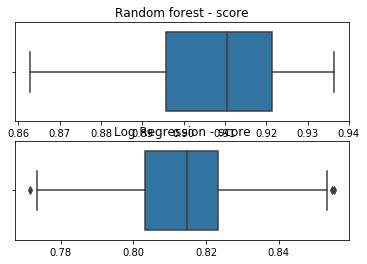

In [99]:
plt.subplot(2,1,1)
sns.boxplot(scores)
plt.title('Random forest - score')

plt.subplot(2,1,2)
sns.boxplot(log_scores)
plt.title('Log Regression - score')
#plt.xlabel('Log Regression - score')
plt.show()

Random forest дает лучший результат

In [65]:
rf_model.fit(trainData, train_label)
preds = rf_model.predict(testData)

log_model.fit(trainData, train_label)
log_preds = log_model.predict(testData)

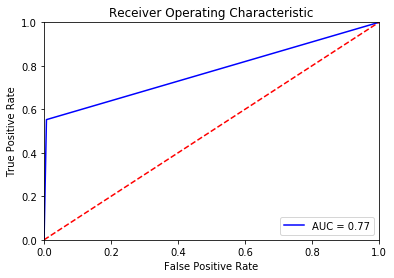

In [66]:
fpr, tpr, threshold = metrics.roc_curve(test_label, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')

plt.show()

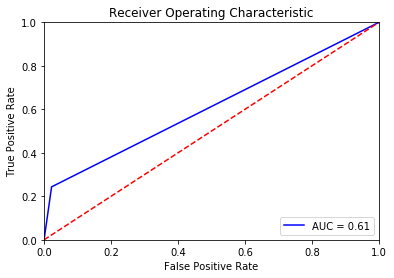

In [67]:
fpr, tpr, threshold = metrics.roc_curve(test_label, log_preds)
roc_auc = metrics.auc(fpr, tpr)

# plot auc
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')

plt.show()

### Задание 5  
  
Настройте гиперпараметры модели SVM на 5-fold валидации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
Каково качество модели? Каков разброс значений метрики? Насколько сильно различие между лучшей и худшей конфигурациями параметров?

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
import numpy as np

In [69]:
std_scaler = StandardScaler()
std_scaler.fit(Data)
norm_Data = std_scaler.transform(Data)

In [75]:
params = {'gamma': np.append(np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1.51, 0.05))}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
svm_model = SVC(kernel='rbf')

clf = GridSearchCV(svm_model, params, cv=rskf, scoring='f1_micro', n_jobs=4)

In [76]:
%%time
clf.fit(norm_Data, label)

Wall time: 15min 5s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x00000294C9D73AC8>,
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'gamma': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
        0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,
        1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [77]:
res = pd.DataFrame({k: clf.cv_results_[k] for k in ['mean_test_score', 'mean_train_score']})
res['gamma'] = params['gamma']

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [78]:
clf.best_params_

{'gamma': 0.069999999999999993}

In [79]:
clf.best_score_

0.90501050105010505

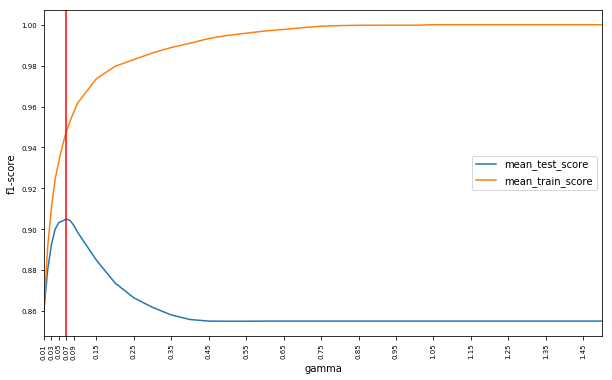

In [80]:
res.plot(x='gamma', figsize=(10, 6), xticks=res['gamma'][::2], rot=90, fontsize=7)
plt.axvline(x=clf.best_params_['gamma'], c='r')
plt.ylabel('f1-score')
plt.show()

### Задание 6  
  
Для алгоритма AdaBoost с параметрами по умолчанию оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты. 

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

In [42]:
f1_train = [] # will be list of lists of scores
acc_train = [] # will be list of lists of scores
f1_test = [] 

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(Data, label):
    
    # train data
    x_train = Data.iloc[train_index] # data
    y_train = label.iloc[train_index] # label
    
    # test data
    x_test = Data.iloc[test_index] # data
    y_test = label.iloc[test_index] # label
    
    ab_model = AdaBoostClassifier()
    ab_model.fit(x_train, y_train)
    
    # f1 on train on each stage
    scores = []
    for s in ab_model.staged_predict(x_train):
        scores.append(metrics.f1_score(y_train, s))
    f1_train.append(scores)
    del scores
    
    # f1 on test on each stage
    scores = []
    for s in ab_model.staged_predict(x_test):
        scores.append(metrics.f1_score(y_test, s))
    f1_test.append(scores)
    del scores
    
    # acc on train on each stage
    acc_train.append(list(ab_model.staged_score(x_train, y_train)))
    
f1_train = pd.DataFrame(f1_train).transpose()
acc_train = pd.DataFrame(acc_train).transpose()
f1_test = pd.DataFrame(f1_test).transpose()

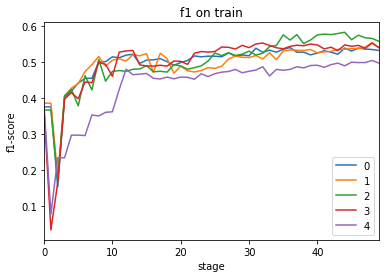

In [43]:
f1_train.plot()

plt.xlabel('stage')
plt.ylabel('f1-score')
plt.title('f1 on train')

plt.show()

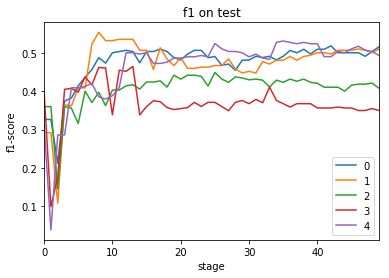

In [44]:
f1_test.plot()

plt.xlabel('stage')
plt.ylabel('f1-score')
plt.title('f1 on test')

plt.show()

### Задание 7  
  
* Настройте гиперпараметры AdaBoost на 5-fold валидации из 5 повторений, используя в качестве базовых классификаторов дерево решений и SVM. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
* Выведите наилучшую конфигурацию параметров для каждого базового классификатора. Сравните качество. 

In [30]:
params = {
    'base_estimator__criterion' : ['gini', 'entropy'],
    'base_estimator__splitter' :   ['best', 'random'],
    'base_estimator__max_depth': range(1, 6, 2),
    'n_estimators': range(10,51,10),
    'learning_rate': [0.5, 0.7, 1]
}

In [101]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
dtree_model = DecisionTreeClassifier()
ab_model = AdaBoostClassifier(base_estimator=dtree_model)
tree_grid = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=2)

In [ ]:
%%time
tree_grid.fit(Data, label)

In [ ]:
tree_grid.best_score_

In [ ]:
tree_grid.best_params_

In [31]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
svm_model = SVC()
ab_model = AdaBoostClassifier(base_estimator=svm_model)
svm_grid = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=2)

NameError: name 'SVC' is not defined

In [ ]:
svm_grid.best_params_

## Часть 3. Соревнование по машинному обучению <a id="part3"></a>

В данном задании вам предлагается принять участие в соревновании на kaggle: [PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction).  
Задача соревнования заключается в том, чтобы предсказать итоговый результат игрока (место в турнирном зачете) в [популярной](https://meduza.io/feature/2017/12/22/u-etoy-igry-net-syuzheta-i-prokachki-ya-potratil-na-nee-100-chasov-zhizni-i-eto-tolko-nachalo) игре PlayerUnknownʼs Battlegrounds на основании результатов предыдущих игр.  
 
Подробное описание задачи, данные и их описание, целевую метрику и правила вы можете найти на странице соревнования. 

Для участия в соревновании, т.е. для того, чтобы скачать данные, сабмитить результаты и попасть в leaderboard, вам необходимо создать аккаунт на [kaggle](https://www.kaggle.com/).

Данное соревнование является `Kernels Only` - это означает, что вы должны сабмитить не файл с предсказаниями для тестовой выборки, а код, который будет выполняться (преобразовывать данные, обучать модель) и создавать файл с предсказаниями. Как это сделать сказано в [описании](https://www.kaggle.com/c/pubg-finish-placement-prediction#Kernels-FAQ), также есть хороший [тьюториал](https://www.kaggle.com/dansbecker/submitting-from-a-kernel).

После того, как вы выполните сабмит, в leaderboard вы сможете посмотреть качество вашей модели на тестовой выборке и место в общем зачете.  
Вы можете делать много (до 10 в день) сабмитов - в leaderbord всегда отображается самый лучший (остальные можно посмотреть в `My Submissions`).

### Задание  
  
Необходимо построить и засабмитить модель, которая:   
* Задача минимум – покажет на тестовой выборке качество выше baseline: 0.2
* Задача максимум - решит задачу как можно точнее  
  
При решении можно и нужно выполнять различные преобразования признаков и применять различные модели машинного обучения.  

В качестве результата необходимо: 
* Сказать ваш логин на kaggle, чтобы мы могли найти вас в leaderboard
* Предоставить скрипт, выполняющий преобразования данных (из формата начальных данных в тот формат, который должна принимать на вход модель) и предсказания, а также сохраненную обученную модель. 
* Предоставить скрипт, который вы сабмитили.
* Сделать краткое описание преобразования данных и итоговой модели. В описание можно также включить некоторые результаты анализа данных (если считаете их полезными и интересными) и собственную оценку модели на кросс-валидации.  
  
По результатам будет составлен наш локальный leaderboard. 